# Neural Network Credit Scoring Model 

## Importing Important Packages

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
from numpy import asarray


## Reading the Data

In [2]:
df=pd.read_csv("cs-training.csv",na_values = "nan")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data preprocessing 

In [3]:
#check for duplicated data
df.duplicated().sum()

0

In [4]:
#handeling missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
#Null values tabel

null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(df) })  

,Column,Number of Null Values,Proportion
0,Unnamed: 0,0,0.000000
1,SeriousDlqin2yrs,0,0.000000
2,RevolvingUtilizationOfUnsecuredLines,0,0.000000
3,age,0,0.000000
4,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
5,DebtRatio,0,0.000000
6,MonthlyIncome,29731,0.198207
7,NumberOfOpenCreditLinesAndLoans,0,0.000000
8,NumberOfTimes90DaysLate,0,0.000000
9,NumberRealEstateLoansOrLines,0,0.000000


## Splitting the Data into independent (X) and dependant (y) features 

In [6]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [7]:
# handeling missing values
from sklearn.impute import SimpleImputer 


imp_mean=SimpleImputer(missing_values= np.nan, strategy="median")
X[:,[4,9]]=imp_mean.fit_transform(X[:,[4,9]])

#### Data Normalization 

In [8]:
#MinMax scaling 
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0) 

##  Defining the architecture of the model

In [10]:
# checking the version of keras
import keras
print(keras.__version__)

2.6.0


In [11]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


In [12]:
# number of input neurons
X_train.shape
X_train.shape[1] #number of features 

10

In [13]:
# define hidden layers and neuron in each layer
input_neurons = X_train.shape[1]
output_neurons = 1
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 100
neuron_hidden_layer_2 = 125
neuron_hidden_layer_3 = 100

# activation function of different layers

#I have picked relu as an activation function for hidden layers, And I have used sigmoid activation function in the final layer

model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

# summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1100      
_________________________________________________________________
dense_1 (Dense)              (None, 125)               12625     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               12600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 26,426
Trainable params: 26,426
Non-trainable params: 0
_________________________________________________________________
None


#### Compiling the model

In [14]:
model.compile(loss='binary_crossentropy',optimizer="SGD",metrics=['accuracy'])

In [16]:
# specify filepath- this will write a new file for each epoch with the epoch number contained within the filename
filepath="model_weights.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, 
                                             save_weights_only=False, save_best_only=False, mode='max')

## Training the model

passing the independent and dependent features for training set for training the model

validation data will be evaluated at the end of each epoch

setting the epochs as 100

storing the trained model in model_history variable which will be used to visualize the training process

In [18]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                          batch_size = 64,callbacks=[checkpoint],
                          initial_epoch=0, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2336 - accuracy: 0.9335 - val_loss: 0.2371 - val_accuracy: 0.9319
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2333 - accuracy: 0.9335 - val_loss: 0.2367 - val_accuracy: 0.9319
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2330 - accuracy: 0.9335 - val_loss: 0.2364 - val_accuracy: 0.9323
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2326 - accuracy: 0.9336 - val_loss: 0.2360 - val_accuracy: 0.9324
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2322 - accuracy: 0.9336 - val_loss: 0.2363 - val_accuracy: 0.9324
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2318 - accuracy: 0.9336 - val_loss: 0.2351 - val_accuracy: 0.9324
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2313 - accuracy: 0.9336 - val_loss: 0.2346 - val_ac

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1934 - accuracy: 0.9362 - val_loss: 0.2119 - val_accuracy: 0.9343
Epoch 58/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1936 - accuracy: 0.9363 - val_loss: 0.2014 - val_accuracy: 0.9353
Epoch 59/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1941 - accuracy: 0.9363 - val_loss: 0.2013 - val_accuracy: 0.9347
Epoch 60/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1935 - accuracy: 0.9366 - val_loss: 0.1992 - val_accuracy: 0.9353
Epoch 61/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1940 - accuracy: 0.9363 - val_loss: 0.1953 - val_accuracy: 0.9354
Epoch 62/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1939 - accuracy: 0.9364 - val_loss: 0.1951 - val_accuracy: 0.9351
Epoch 63/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1934 - accuracy: 0.9363 - val_loss: 0.1962 - val_accuracy

In [19]:
final_loss, final_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))  

Final Loss: 0.19447533786296844, Final Accuracy: 0.9355666637420654


## Evaluating model performance on validation set

In [20]:
# getting predictions for the validation set
prediction = model.predict(X_test)
prediction = (prediction > 0.5)
MOH=np.concatenate((prediction.reshape(len(prediction),1), y_test.reshape(len(y_test),1)),1)

In [21]:
df1 = pd.DataFrame(MOH, columns = ['prediction','actual'])

print(df1)
print(type(df1))

       prediction  actual
0               0       0
1               0       0
2               0       0
3               0       0
4               0       0
...           ...     ...
29995           0       0
29996           0       0
29997           0       0
29998           0       0
29999           0       0

[30000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [22]:
df1.to_csv('out.csv')

In [23]:
# calculating the accuracy on validation set
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, prediction)
print(accuracy)

0.9355666666666667


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, prediction)
print(cm)

[[27746   211]
 [ 1722   321]]


## Visualizing the model performance

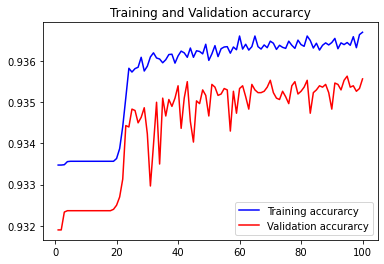

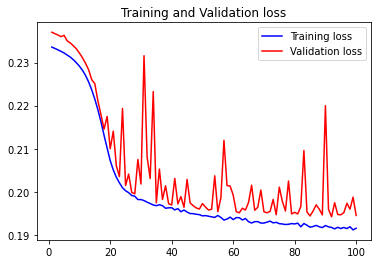

In [25]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [42]:
conda list -e > requirements.txt


Note: you may need to restart the kernel to use updated packages.
